# Regression with XGBoost
>  After a brief review of supervised regression, you'll apply XGBoost to the regression task of predicting house prices in Ames, Iowa. You'll learn about the two kinds of base learners that XGboost can use as its weak learners, and review how to evaluate the quality of your regression models.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp, XGBoost]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 2 exercises "Extreme Gradient Boosting with XGBoost" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)
from sklearn.model_selection import train_test_split
import xgboost as xgb

## Regression review

### Which of these is a regression problem?

<p>Here are 4 potential machine learning problems you might encounter in the wild. Pick the one that is a clear example of a regression problem.</p>

<pre>
Possible Answers

Recommending a restaurant to a user given their past history of restaurant visits and reviews for a dining aggregator app.

Predicting which of several thousand diseases a given person is most likely to have given their symptoms.

Tagging an email as spam/not spam based on its content and metadata (sender, time sent, etc.).

<b>Predicting the expected payout of an auto insurance claim given claim properties (car, accident type, driver prior history, etc.).</b>
</pre>

**This is indeed an example of a regression problem.**

## Objective (loss) functions and base learners

### Decision trees as base learners

<div class=""><p>It's now time to build an XGBoost model to predict house prices - not in Boston, Massachusetts, as you saw in the video, but in Ames, Iowa! This dataset of housing prices has been pre-loaded into a DataFrame called <code>df</code>. If you explore it in the Shell, you'll see that there are a variety of features about the house and its location in the city.</p>
<p>In this exercise, your goal is to use trees as base learners. By default, XGBoost uses trees as base learners, so you don't have to specify that you want to use trees here with <code>booster="gbtree"</code>.</p>
<p><code>xgboost</code> has been imported as <code>xgb</code> and the arrays for the features and the target are available in <code>X</code> and <code>y</code>, respectively.</p></div>

In [17]:
from sklearn.metrics import mean_squared_error

df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/05-extreme-gradient-boosting-with-xgboost/datasets/boston_1460x57.csv')
X, y = df.iloc[:, :-1], df.iloc[:, -1]

Instructions
<ul>
<li>Split <code>df</code> into training and testing sets, holding out 20% for testing. Use a <code>random_state</code> of <code>123</code>.</li>
<li>Instantiate the <code>XGBRegressor</code> as <code>xg_reg</code>, using a <code>seed</code> of <code>123</code>. Specify an objective of <code>"reg:linear"</code> and use 10 trees. Note: You don't have to specify <code>booster="gbtree"</code> as this is the default.</li>
<li>Fit <code>xg_reg</code> to the training data and predict the labels of the test set. Save the predictions in a variable called <code>preds</code>.</li>
<li>Compute the <code>rmse</code> using <code>np.sqrt()</code> and the <code>mean_squared_error()</code> function from <code>sklearn.metrics</code>, which has been pre-imported.</li>
</ul>

In [19]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
#reg:linear -> deprecated
#prefer -> reg:squarederror
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123) #reg:linear

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 78847.401758


**Next, you'll train an XGBoost model using linear base learners and XGBoost's learning API. Will it perform better or worse?**

### Linear base learners

<div class=""><p>Now that you've used trees as base models in XGBoost, let's use the other kind of base model that can be used with XGBoost - a linear learner. This model, although not as commonly used in XGBoost, allows you to create a regularized linear regression using XGBoost's powerful learning API. However, because it's uncommon, you have to use XGBoost's own non-scikit-learn compatible functions to build the model, such as <code>xgb.train()</code>. </p>
<p>In order to do this you must create the parameter dictionary that describes the kind of booster you want to use (similarly to how <a href="https://campus.datacamp.com/courses/extreme-gradient-boosting-with-xgboost/10555?ex=9" target="_blank" rel="noopener noreferrer">you created the dictionary in Chapter 1</a> when you used <code>xgb.cv()</code>). The key-value pair that defines the booster type (base model) you need is <code>"booster":"gblinear"</code>.</p>
<p>Once you've created the model, you can use the <code>.train()</code> and <code>.predict()</code> methods of the model just like you've done in the past.</p>
<p>Here, the data has already been split into training and testing sets, so you can dive right into creating the <code>DMatrix</code> objects required by the XGBoost learning API.</p></div>

In [30]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Instructions
<ul>
<li>Create two <code>DMatrix</code> objects - <code>DM_train</code> for the training set (<code>X_train</code> and <code>y_train</code>), and <code>DM_test</code> (<code>X_test</code> and <code>y_test</code>) for the test set.</li>
<li>Create a parameter dictionary that defines the <code>"booster"</code> type you will use (<code>"gblinear"</code>) as well as the <code>"objective"</code> you will minimize (<code>"reg:linear"</code>).</li>
<li>Train the model using <code>xgb.train()</code>. You have to specify arguments for the following parameters: <code>params</code>, <code>dtrain</code>, and <code>num_boost_round</code>. Use <code>5</code> boosting rounds. </li>
<li>Predict the labels on the test set using <code>xg_reg.predict()</code>, passing it <code>DM_test</code>. Assign to <code>preds</code>.</li>
<li>Hit 'Submit Answer' to view the RMSE!</li>
</ul>

In [31]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(X_test, y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:squarederror"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 44331.645061


**it looks like linear base learners performed better!**

## Evaluating model quality

<div class=""><p>It's now time to begin evaluating model quality.  </p>
<p>Here, you will compare the RMSE and MAE of a cross-validated XGBoost model on the Ames housing data. As in previous exercises, all necessary modules have been pre-loaded and the data is available in the DataFrame <code>df</code>.</p></div>

Instructions 1/2
<ul>
<li>Perform 4-fold cross-validation with <code>5</code> boosting rounds and <code>"rmse"</code> as the metric.</li>
<li>Extract and print the final boosting round RMSE.</li>
</ul>

In [33]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='rmse', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.488281      429.449371   142980.464844    1193.806011
1    102832.562500      322.503447   104891.398438    1223.161012
2     75872.621094      266.493573    79478.947265    1601.341377
3     57245.657226      273.633063    62411.919922    2220.151162
4     44401.291992      316.426590    51348.276367    2963.378029
4    51348.276367
Name: test-rmse-mean, dtype: float64


Instructions 2/2
<p>Now, adapt your code to compute the <code>"mae"</code> instead of the <code>"rmse"</code>.</p>

In [35]:
# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='mae', as_pandas=True, seed=123)
# Print cv_results
print(cv_results)
# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.595703     668.167771  127634.185547   2404.009753
1    89770.031250     456.980559   90122.505860   2107.916842
2    63580.782226     263.442189   64278.558594   1887.552548
3    45633.181640     151.849960   46819.175781   1459.821980
4    33587.097656      87.003217   35670.655274   1140.613227
4    35670.655274
Name: test-mae-mean, dtype: float64


## Regularization and base learners in XGBoost

### Using regularization in XGBoost

<p>Having seen an example of l1 regularization in the video, you'll now vary the l2 regularization penalty - also known as <code>"lambda"</code> - and see its effect on overall model performance on the Ames housing dataset.</p>

Instructions
<ul>
<li>Create your <code>DMatrix</code> from <code>X</code> and <code>y</code> as before.</li>
<li>Create an initial parameter dictionary specifying an <code>"objective"</code> of <code>"reg:linear"</code> and <code>"max_depth"</code> of <code>3</code>.</li>
<li>Use <code>xgb.cv()</code> inside of a <code>for</code> loop and systematically vary the <code>"lambda"</code> value by passing in the current l2 value (<code>reg</code>).</li>
<li>Append the <code>"test-rmse-mean"</code> from the last boosting round for each cross-validated <code>xgboost</code> model.</li>
<li>Hit 'Submit Answer' to view the results. What do you notice?</li>
</ul>

In [37]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2          rmse
0    1  52275.355469
1   10  57746.060547
2  100  76624.617188


**It looks like as as the value of 'lambda' increases, so does the RMSE.**

### Visualizing individual XGBoost trees

<div class=""><p>Now that you've used XGBoost to both build and evaluate regression as well as classification models, you should get a handle on how to visually explore your models. Here, you will visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset.</p>
<p>XGBoost has a <code>plot_tree()</code> function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the <code>plot_tree()</code> function along with the number of trees you want to plot using the <code>num_trees</code> argument.</p></div>

Instructions
<ul>
<li>Create a parameter dictionary with an <code>"objective"</code> of <code>"reg:linear"</code> and a <code>"max_depth"</code> of <code>2</code>.</li>
<li>Train the model using <code>10</code> boosting rounds and the parameter dictionary you created. Save the result in <code>xg_reg</code>.</li>
<li>Plot the first tree using <code>xgb.plot_tree()</code>. It takes in two arguments - the model (in this case, <code>xg_reg</code>), and <code>num_trees</code>, which is 0-indexed. So to plot the first tree, specify <code>num_trees=0</code>.</li>
<li>Plot the fifth tree.</li>
<li>Plot the last (tenth) tree sideways. To do this, specify the additional keyword argument <code>rankdir="LR"</code>.</li>
</ul>

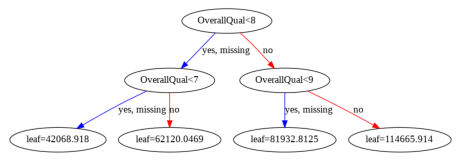

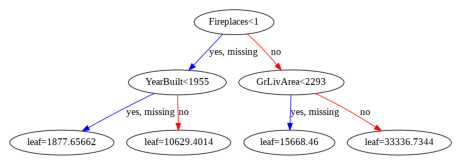

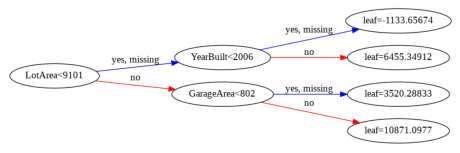

In [39]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9, rankdir="LR")
plt.show()

**Have a look at each of the plots. They provide insight into how the model arrived at its final decisions and what splits it made to arrive at those decisions. This allows us to identify which features are the most important in determining house price. In the next exercise, you'll learn another way of visualizing feature importances.**

### Visualizing feature importances: What features are most important in my dataset

<div class=""><p>Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model. </p>
<p>One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a <code>plot_importance()</code> function that allows you to do exactly this, and you'll get a chance to use it in this exercise!</p></div>

Instructions
<ul>
<li>Create your <code>DMatrix</code> from <code>X</code> and <code>y</code> as before.</li>
<li>Create a parameter dictionary with appropriate <code>"objective"</code> (<code>"reg:linear"</code>) and a <code>"max_depth"</code> of <code>4</code>.</li>
<li>Train the model with <code>10</code> boosting rounds, exactly as you did in the previous exercise.</li>
<li>Use <code>xgb.plot_importance()</code> and pass in the trained model to generate the graph of feature importances.</li>
</ul>

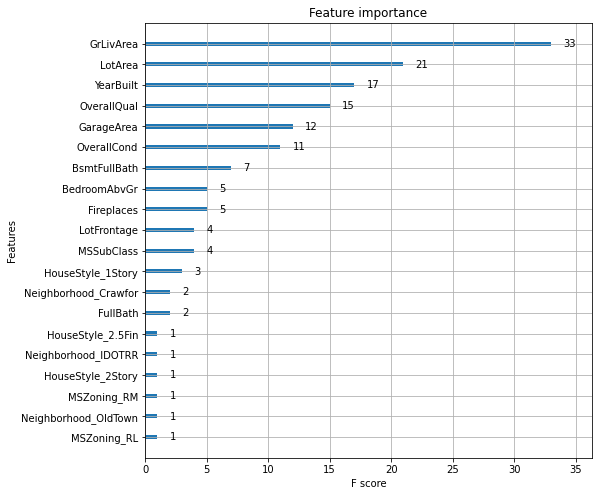

In [41]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(X, y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Train the model: xg_reg
xg_reg = xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

**It looks like GrLivArea is the most important feature. Congratulations on completing Chapter 2!**